In [153]:
#Importing relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [154]:
# read the csv data into a dataframe

df_raw = pd.read_csv(r"large_sales_data_with_region.csv")

In [155]:
df_raw.head()

,date,product_id,product_name,quantity_sold,price_per_unit,total_sale_amount,region
0,2022-01-01,151,Product E,11.0,70.39,774.29,Lagos
1,2022-01-01,192,Product D,38.0,47.40,1801.20,Lagos
2,2022-01-01,114,Product B,NaN,50.72,NaN,Abuja
3,2022-01-01,171,Product D,20.0,12.62,252.40,Benin City
4,2022-01-01,160,Product B,20.0,9.23,184.60,Abuja


In [156]:
df_raw.tail()

,date,product_id,product_name,quantity_sold,price_per_unit,total_sale_amount,region
4999995,2158-11-23,120,Product B,3.0,67.05,201.15,Benin City
4999996,2158-11-23,138,Product C,NaN,48.01,NaN,Benin City
4999997,2158-11-23,175,Product B,43.0,16.72,718.96,Benin City
4999998,2158-11-23,103,Product B,36.0,15.11,543.96,Lagos
4999999,2158-11-23,197,Product D,15.0,67.86,1017.90,Benin City


### Data Understanding

In [157]:
df_raw.shape

(5000000, 7)

In [158]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   date               object 
 1   product_id         int64  
 2   product_name       object 
 3   quantity_sold      float64
 4   price_per_unit     float64
 5   total_sale_amount  float64
 6   region             object 
dtypes: float64(3), int64(1), object(3)
memory usage: 267.0+ MB


In [159]:
df_raw.head(10)

,date,product_id,product_name,quantity_sold,price_per_unit,total_sale_amount,region
0,2022-01-01,151,Product E,11.0,70.39,774.29,Lagos
1,2022-01-01,192,Product D,38.0,47.40,1801.20,Lagos
2,2022-01-01,114,Product B,NaN,50.72,NaN,Abuja
3,2022-01-01,171,Product D,20.0,12.62,252.40,Benin City
4,2022-01-01,160,Product B,20.0,9.23,184.60,Abuja
5,2022-01-01,120,Product B,3.0,61.29,183.87,Benin City
6,2022-01-01,182,Product D,47.0,75.89,3566.83,Lagos
7,2022-01-01,186,Product A,1.0,17.29,17.29,Abuja
8,2022-01-01,174,Product A,10.0,72.54,725.40,Abuja
9,2022-01-01,174,Product C,17.0,61.19,1040.23,Abuja


In [160]:
df_raw.product_id.nunique()

100

In [161]:
df_raw.product_id.unique()

array([151, 192, 114, 171, 160, 120, 182, 186, 174, 187, 199, 123, 102,
       121, 152, 101, 129, 137, 163, 159, 132, 175, 157, 188, 148, 190,
       158, 141, 191, 179, 161, 146, 150, 154, 106, 172, 138, 117, 103,
       113, 108, 189, 183, 170, 143, 107, 134, 177, 180, 135, 149, 105,
       153, 162, 133, 173, 194, 147, 139, 184, 181, 125, 140, 128, 144,
       164, 100, 110, 104, 127, 111, 122, 136, 198, 185, 126, 178, 176,
       195, 193, 142, 112, 131, 165, 156, 196, 169, 155, 118, 167, 116,
       168, 197, 115, 119, 166, 130, 124, 145, 109], dtype=int64)

In [162]:
df_raw.product_name.nunique()

5

In [163]:
df_raw.product_name.unique()

array(['Product E', 'Product D', 'Product B', 'Product A', 'Product C'],
      dtype=object)

In [164]:
df_raw.region.nunique()

4

In [165]:
df_raw.region.unique()

array(['Lagos', 'Abuja', 'Benin City', 'Port Harcourt'], dtype=object)

In [166]:
df_raw.date.nunique()

50000

In [167]:
df_raw.date.unique()

array(['2022-01-01', '2022-01-02', '2022-01-03', ..., '2158-11-21',
       '2158-11-22', '2158-11-23'], dtype=object)

In [168]:
df_raw.describe()

,product_id,quantity_sold,price_per_unit,total_sale_amount
count,5.000000e+06,4.950000e+06,4.950000e+06,4.900530e+06
mean,1.494971e+02,2.501043e+01,5.250603e+01,1.313214e+03
std,2.886969e+01,1.413832e+01,2.741702e+01,1.082206e+03
min,1.000000e+02,1.000000e+00,5.000000e+00,5.000000e+00
25%,1.240000e+02,1.300000e+01,2.876000e+01,4.220400e+02
50%,1.490000e+02,2.500000e+01,5.251000e+01,1.015680e+03
75%,1.750000e+02,3.700000e+01,7.624000e+01,1.971800e+03
max,1.990000e+02,4.900000e+01,1.000000e+02,4.900000e+03


In [169]:
# to get the number of null values
df_raw.isnull().sum()

date                     0
product_id               0
product_name             0
quantity_sold        50000
price_per_unit       50000
total_sale_amount    99470
region                   0
dtype: int64

In [170]:
# to get the percentages of nulls in each
null_percentages = (df_raw.isnull().sum()/len(df_raw)) * 100
null_percentages.round(2)

date                 0.00
product_id           0.00
product_name         0.00
quantity_sold        1.00
price_per_unit       1.00
total_sale_amount    1.99
region               0.00
dtype: float64

### Data Cleaning and Preparation

#### Standardizing Features to Appropriate Formats 

In [171]:
# Convert product_id variable to category
df_raw['product_id'] = df_raw['product_id'].astype('category')
df_raw['product_name'] = df_raw['product_name'].astype('category')
df_raw['region'] = df_raw['region'].astype('category')

# Convert date variable to datetime
df_raw['date'] = pd.to_datetime(df_raw['date'], errors='coerce')

In [172]:
df_raw.head(10)

,date,product_id,product_name,quantity_sold,price_per_unit,total_sale_amount,region
0,2022-01-01,151,Product E,11.0,70.39,774.29,Lagos
1,2022-01-01,192,Product D,38.0,47.40,1801.20,Lagos
2,2022-01-01,114,Product B,NaN,50.72,NaN,Abuja
3,2022-01-01,171,Product D,20.0,12.62,252.40,Benin City
4,2022-01-01,160,Product B,20.0,9.23,184.60,Abuja
5,2022-01-01,120,Product B,3.0,61.29,183.87,Benin City
6,2022-01-01,182,Product D,47.0,75.89,3566.83,Lagos
7,2022-01-01,186,Product A,1.0,17.29,17.29,Abuja
8,2022-01-01,174,Product A,10.0,72.54,725.40,Abuja
9,2022-01-01,174,Product C,17.0,61.19,1040.23,Abuja


In [173]:
# to verify that the datatyoe conversion took place
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   product_id         category      
 2   product_name       category      
 3   quantity_sold      float64       
 4   price_per_unit     float64       
 5   total_sale_amount  float64       
 6   region             category      
dtypes: category(3), datetime64[ns](1), float64(3)
memory usage: 166.9 MB


In [174]:
# dropping nulls
df_raw.dropna(inplace = True)

In [175]:
df_raw.shape

(4900530, 7)

In [176]:
# confirming nulls dropped
df_raw.isnull().sum()

date                 0
product_id           0
product_name         0
quantity_sold        0
price_per_unit       0
total_sale_amount    0
region               0
dtype: int64

In [177]:
# creating a function that checks for the number of decimal places in the three float columns

def count_decimal_places(x):
    str_x = str(x).rstrip('0').rstrip('.')
    if '.' in str_x:
        return len(str_x.split('.')[1])
    else:
        return 0

columns_to_check = ['quantity_sold', 'price_per_unit', 'total_sale_amount']
decimal_places_df = df_raw[columns_to_check].applymap(count_decimal_places)

# Find the maximum number of decimal places in each column
max_decimal_places = decimal_places_df.max()

print("Maximum number of decimal places in each column:")
print(max_decimal_places)

Maximum number of decimal places in each column:
quantity_sold         0
price_per_unit        2
total_sale_amount    15
dtype: int64


In [178]:
# standardizing all floats to 2 d.p

columns_to_round = ['quantity_sold', 'price_per_unit', 'total_sale_amount']
df_raw[columns_to_round] = df_raw[columns_to_round].round(2)

In [179]:
# rechecking decimal place

decimal_places_df = df_raw[columns_to_check].applymap(count_decimal_places)


max_decimal_places = decimal_places_df.max()

print("Maximum number of decimal places in each column:")
print(max_decimal_places)

Maximum number of decimal places in each column:
quantity_sold        0
price_per_unit       2
total_sale_amount    2
dtype: int64


### Understanding and handling outliers

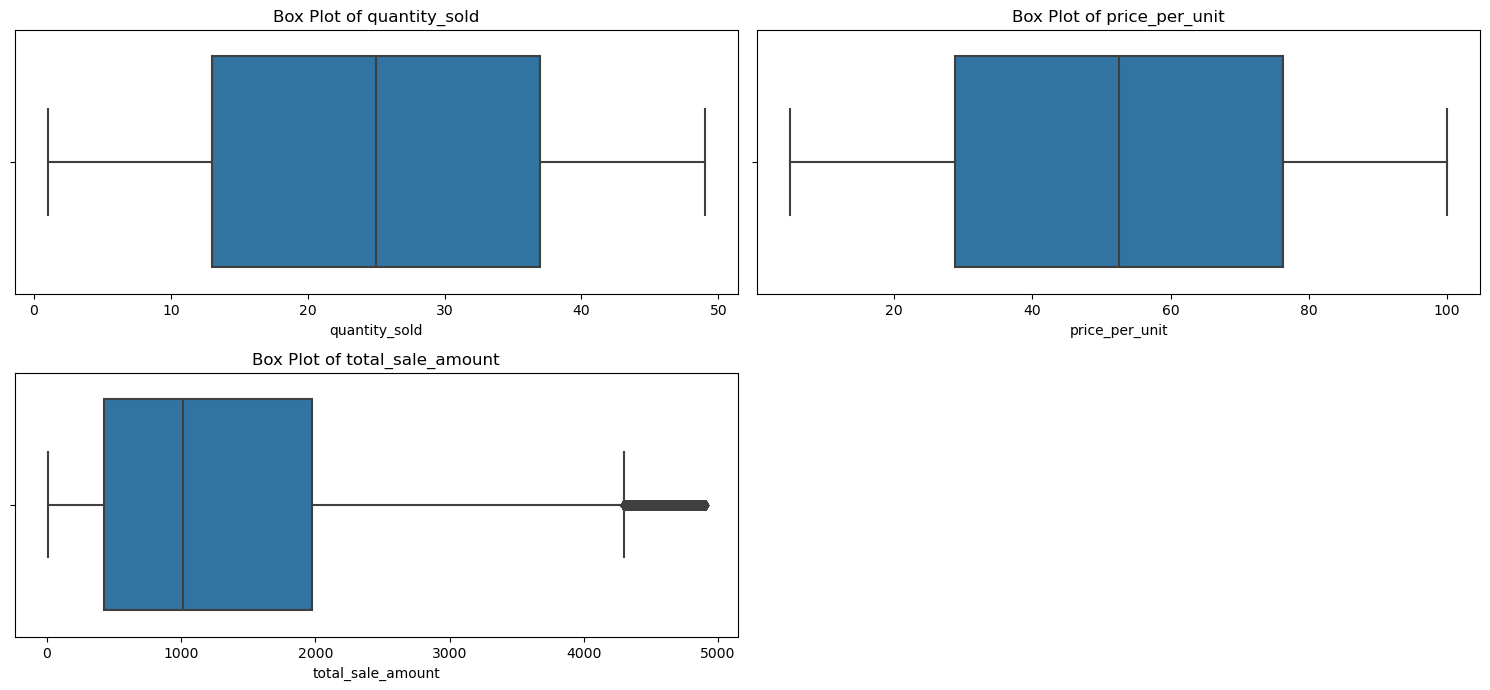

In [180]:
# creating boxplots to check for outliers in all three continuous variables

cols_for_outlier_analysis = ['quantity_sold', 'price_per_unit', 'total_sale_amount']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_for_outlier_analysis, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df_raw, x=col)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

<Axes: xlabel='total_sale_amount', ylabel='Density'>

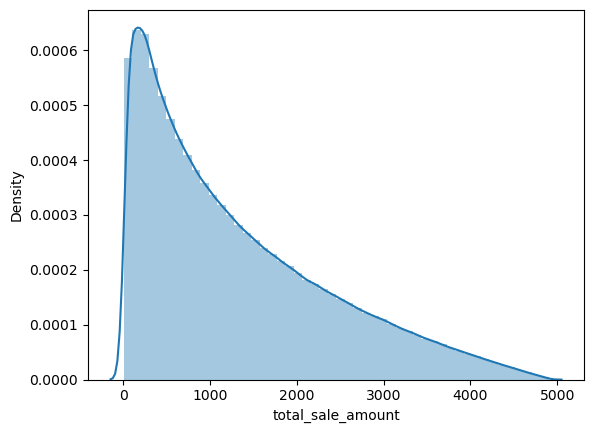

In [181]:
# looks like we have outliers in the 'total_sale_amount' column. investigating further;

sns.distplot(df_raw['total_sale_amount'])

From the density plot above, it appears that the ***total_sale_amount*** variable is right-skewed, indicating the presence of some high-value outliers. Given the apparent skewness of our data, the IQR method is a suitable choice as it is robust and can handle a variety of data skewness without the restrictions that come with parametric outlier removal methods such like the Z-score method. For instance, we can only apply the z-score method in normal or near-normal distributions which is apparently not the case in this situation.

In [182]:
# Before we apply the IQR outlier removal method let's examine the outliers in question

Q1 = df_raw['total_sale_amount'].quantile(0.25)
Q3 = df_raw['total_sale_amount'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_raw.loc[df_raw['total_sale_amount'] > upper_bound]

,date,product_id,product_name,quantity_sold,price_per_unit,total_sale_amount,region
82,2022-01-01,133,Product E,46.0,94.18,4332.28,Benin City
109,2022-01-02,170,Product C,48.0,93.79,4501.92,Lagos
247,2022-01-03,197,Product E,46.0,97.78,4497.88,Benin City
357,2022-01-04,168,Product D,49.0,96.75,4740.75,Port Harcourt
465,2022-01-05,154,Product D,49.0,94.92,4651.08,Abuja
...,...,...,...,...,...,...,...
4999854,2158-11-22,168,Product E,48.0,95.37,4577.76,Port Harcourt
4999881,2158-11-22,139,Product E,48.0,94.62,4541.76,Lagos
4999899,2158-11-22,116,Product A,46.0,96.87,4456.02,Benin City
4999903,2158-11-23,181,Product E,48.0,91.95,4413.60,Lagos


In [183]:
# sorting the outlier set by the total_sale_amount column we have:

df_raw.loc[df_raw['total_sale_amount'] > upper_bound].sort_values(by='total_sale_amount', ascending = False)

,date,product_id,product_name,quantity_sold,price_per_unit,total_sale_amount,region
185097,2027-01-25,190,Product B,49.0,100.00,4900.00,Port Harcourt
3073934,2106-03-01,147,Product A,49.0,100.00,4900.00,Port Harcourt
4917183,2156-08-17,183,Product A,49.0,100.00,4900.00,Benin City
698429,2041-02-14,191,Product E,49.0,100.00,4900.00,Abuja
1087275,2051-10-08,178,Product A,49.0,100.00,4900.00,Lagos
...,...,...,...,...,...,...,...
4303161,2139-10-26,106,Product C,48.0,89.51,4296.48,Benin City
2689691,2095-08-22,142,Product E,48.0,89.51,4296.48,Lagos
903379,2046-09-25,122,Product D,48.0,89.51,4296.48,Abuja
1237739,2055-11-21,153,Product A,48.0,89.51,4296.48,Benin City


At this point, I can infer or presume that the outliers identified in this ***total_sale_amount*** column by the IQR method are not necessarily outliers for the sake of the definition; but instead, are outliers due to the higher proportion of one of the variable used to calculate this column. To further explain:  

To calculate the ***total_sale_amount*** column, we would need to multiply quantity sold by price; i.e.  

***total_sale_amount*** = ***quantity_sold*** x ***price_per_unit***  

The price_per_unit for the products in this dataset is capped at 100. However, the quantity sold for the products in this outlier portion of the dataset (depicted above) are quite high. And that is why we have our ***total_sale_amount*** to be that high to the point where the IQR method tags it as an outlier.  

To further butteress this point, let's examine other products with high price points:


In [184]:
df_raw.loc[df_raw['total_sale_amount'] <= upper_bound].sort_values(by='price_per_unit', ascending = False)

,date,product_id,product_name,quantity_sold,price_per_unit,total_sale_amount,region
883667,2046-03-12,101,Product E,14.0,100.0,1400.0,Port Harcourt
4390320,2142-03-16,192,Product D,24.0,100.0,2400.0,Lagos
2026086,2077-06-21,182,Product E,12.0,100.0,1200.0,Lagos
4855647,2154-12-11,169,Product A,15.0,100.0,1500.0,Benin City
2392686,2087-07-05,197,Product A,34.0,100.0,3400.0,Benin City
...,...,...,...,...,...,...,...
1094296,2051-12-17,158,Product A,43.0,5.0,215.0,Abuja
1816795,2071-09-28,152,Product A,8.0,5.0,40.0,Port Harcourt
2454919,2089-03-19,179,Product B,5.0,5.0,25.0,Benin City
4946550,2157-06-07,115,Product D,5.0,5.0,25.0,Abuja


As I suspected, we have expensive products (i.e where price is up to 100) that are total_sale_amount outliers because the quantity sold is not as high. But to further confim this presupposition, let's examine one high-end, outlier product.  

In [185]:
# examining product B with product id 190.

df_raw.loc[(df_raw.product_name == 'Product B') & (df_raw.product_id == 190)].sort_values(
    by='total_sale_amount', ascending=False).head(10)

,date,product_id,product_name,quantity_sold,price_per_unit,total_sale_amount,region
185097,2027-01-25,190,Product B,49.0,100.00,4900.00,Port Harcourt
4311044,2140-01-13,190,Product B,49.0,99.54,4877.46,Port Harcourt
2855780,2100-03-10,190,Product B,49.0,99.03,4852.47,Port Harcourt
3539943,2118-12-03,190,Product B,49.0,98.62,4832.38,Port Harcourt
1294827,2057-06-14,190,Product B,49.0,98.38,4820.62,Port Harcourt
2315867,2085-05-28,190,Product B,49.0,98.29,4816.21,Port Harcourt
4269649,2138-11-25,190,Product B,48.0,99.59,4780.32,Port Harcourt
1608361,2066-01-13,190,Product B,48.0,99.46,4774.08,Port Harcourt
1347400,2058-11-22,190,Product B,48.0,99.44,4773.12,Port Harcourt
3754690,2124-10-19,190,Product B,49.0,97.06,4755.94,Port Harcourt


In [186]:
df_raw.loc[(df_raw.product_name == 'Product B') & (df_raw.product_id == 190) & (df_raw.quantity_sold >= 40)].sort_values(
    by='quantity_sold', ascending=False).head(20)

,date,product_id,product_name,quantity_sold,price_per_unit,total_sale_amount,region
619874,2038-12-21,190,Product B,49.0,17.78,871.22,Port Harcourt
4481054,2144-09-08,190,Product B,49.0,7.80,382.20,Port Harcourt
2834402,2099-08-09,190,Product B,49.0,17.53,858.97,Port Harcourt
2019108,2077-04-13,190,Product B,49.0,21.58,1057.42,Port Harcourt
2855780,2100-03-10,190,Product B,49.0,99.03,4852.47,Port Harcourt
4583612,2147-07-01,190,Product B,49.0,44.17,2164.33,Port Harcourt
402668,2033-01-09,190,Product B,49.0,27.89,1366.61,Port Harcourt
927632,2047-05-26,190,Product B,49.0,83.94,4113.06,Port Harcourt
4579195,2147-05-17,190,Product B,49.0,39.66,1943.34,Port Harcourt
1997869,2076-09-12,190,Product B,49.0,50.51,2474.99,Port Harcourt


Upon further investigation of one of the products in the outlier upper bound (Product B with product_id 190 in particular) we find that the product has a wide range of prices, from low to very high, while still maintaining high demand.  

Initially, I was concerned that the outliers from our IQR method were perhaps high-end, expensive products that are in high demand and removing these outliers might exclude these products which could potentially skew the business perspective. However, this thorough ivestigation revealed a wide range of price values and high demand at both high and low price points for a single product.  

This variability indicates that the extremely high ***total_sale_amount*** values do represent true outliers. Removing these outliers therefore will ensure a more accurate representation of typical sales patterns, leading to more reliable insights and decision-making.

### Removing Outliers

In [187]:
# removing outliers using the IQR method

Q1 = df_raw['total_sale_amount'].quantile(0.25)
Q3 = df_raw['total_sale_amount'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_cleaned = df_raw[(df_raw['total_sale_amount'] > lower_bound) & (df_raw['total_sale_amount'] < upper_bound)]

In [188]:
upper_bound

4296.44

In [189]:
Q3

1971.8

In [190]:
IQR

1549.76

In [193]:
# resetting index in cleaned dataset
df_cleaned.reset_index(drop=True, inplace=True)

In [196]:
#examining cleaned dataset
df_cleaned

,date,product_id,product_name,quantity_sold,price_per_unit,total_sale_amount,region
0,2022-01-01,151,Product E,11.0,70.39,774.29,Lagos
1,2022-01-01,192,Product D,38.0,47.40,1801.20,Lagos
2,2022-01-01,171,Product D,20.0,12.62,252.40,Benin City
3,2022-01-01,160,Product B,20.0,9.23,184.60,Abuja
4,2022-01-01,120,Product B,3.0,61.29,183.87,Benin City
...,...,...,...,...,...,...,...
4853182,2158-11-23,131,Product D,32.0,50.00,1600.00,Lagos
4853183,2158-11-23,120,Product B,3.0,67.05,201.15,Benin City
4853184,2158-11-23,175,Product B,43.0,16.72,718.96,Benin City
4853185,2158-11-23,103,Product B,36.0,15.11,543.96,Lagos


In [195]:
df_cleaned.shape

(4853187, 7)

In [138]:
# save data for tableau

df_cleaned.to_csv('tableau_data.csv', index=False, encoding='utf-8-sig', header=True)